# Seminar 4 (Momentum)

## Problem 1: two-dimensional classification

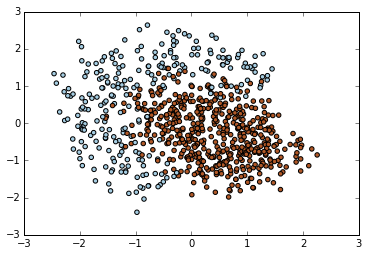

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython import display
from sklearn import datasets, preprocessing

(X, y) = datasets.make_circles(n_samples=1024, shuffle=True, noise=0.2, factor=0.4)
ind = np.logical_or(y==1, X[:,1] > 0)
X = X[ind,:]
# chosen some X for with 1 class or second coord > 0
m = np.array([[1, 1], [-2, 1]])
X = X.dot(m)
X = preprocessing.scale(X)
y = y[ind]
y = 2*y - 1
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

In [94]:
from time import time

Implement classification with hinge loss.
You should use up to the second order terms of X for your classifier, as in function f.

In [270]:
def f(X, w):
    X_ = np.zeros((X.shape[0], 5))
    X_[:,0:2] = X
    X_[:,2:4] = X**2
    X_[:,4] = X[:,0] * X[:,1] 
    return np.dot(X_, w[:-1]) + w[-1]

def classify(X, w):
    res = np.sign(f(X, w))
    for i in xrange(res.shape[0]):
        if res[i] == 0:
            res[i] = 1
    return res

def compute_loss(X, y, w):
    loss = 0
    for el in (1 - f(X, w) * y):
        if el > 0:
            loss += el
    return loss

def pr(X):
    res = np.zeros((X.shape[0], 6))
    #print X.shape, res.shape
    res[:, 0:2] = X
    res[:, 2:4] = X ** 2
    res[:, 4] = X[:, 0] * X[:, 1]
    res[:, 5] = 1
    return res

def compute_grad(X, y, w):
    grad = np.zeros(w.shape)
    proj = pr(X)
    for i in xrange(X.shape[0]):
        for j in xrange(w.shape[0]):
            if f(X, w)[i] < 1:
                grad[j] -= y[i] * proj[i, j]
    return grad

def compute_grad_nesterov(X, y, w, v, mu):
    grad = np.zeros(w.shape)
    proj = pr(X)
    for i in xrange(X.shape[0]):
        for j in xrange(w.shape[0]):
            if f(X, w)[i] < 1:
                grad[j] -= y[i] * (proj[i, j] + v[j] * mu)
    return grad

In [354]:
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
def plot_points(X, y, w):
    Z = classify(np.c_[xx.ravel(), yy.ravel()], w)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    display.clear_output(wait=True)
    display.display(plt.gcf())
def plot_loss(loss):
    plt.clf()
    plt.plot(loss)
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    plt.show()

Find an optimal learning rate for gradient descent for given batch size

**Don't change the batch size!**

In [355]:
w = np.array([1,0,0,0,0,0])

alpha = 0.0 # learning rate

starttime = time()
n_iter = 50
batch_size = 4
losses = []
alphas = (0.001, 0.002, 0.003, 0.004, 0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9)
for alpha in alphas:
    losses_iter = []
    for tst_iter in xrange(15):
        w = np.array([1,0,0,0,0,0])
        loss = np.zeros(n_iter)
        for i in range(n_iter):
            ind = random.sample(range(X.shape[0]), batch_size)
            #plot_points(X[ind,:], y[ind], w)
            loss[i] = compute_loss(X, y, w)
    
            w = w - alpha * compute_grad(X[ind,:], y[ind], w)
        
        losses_iter.append(loss) 
    loss = np.zeros(n_iter)
    for tst_iter in xrange(10):
        loss += losses_iter[tst_iter]
    losses.append(loss/10)
print time() - starttime

39.810423851


In [357]:
for i in xrange(len(losses)):
    #if np.max(losses[i]) < 2500:# and i in (0,2):
    #    plt.plot(losses[i])
    print i, alphas[i], round(np.mean(losses[i])), round(np.max(losses[i][30:])),  round(np.mean(losses[i][30:])), round(np.min(losses[i]))

 0 0.001 453.0 449.0 445.0 441.0
1 0.002 443.0 437.0 431.0 424.0
2 0.003 437.0 432.0 423.0 416.0
3 0.004 426.0 420.0 409.0 400.0
4 0.005 423.0 409.0 400.0 396.0
5 0.01 417.0 414.0 405.0 397.0
6 0.02 457.0 595.0 502.0 405.0
7 0.03 513.0 676.0 602.0 414.0
8 0.04 616.0 883.0 749.0 416.0
9 0.05 666.0 1013.0 870.0 376.0
10 0.06 759.0 1113.0 999.0 406.0
11 0.07 836.0 1370.0 1147.0 438.0
12 0.08 991.0 1653.0 1415.0 466.0
13 0.09 1068.0 1718.0 1507.0 443.0
14 0.1 970.0 1904.0 1448.0 414.0
15 0.2 1789.0 2800.0 2516.0 466.0
16 0.3 2568.0 4581.0 3622.0 466.0
17 0.4 2779.0 5692.0 4167.0 466.0
18 0.5 3924.0 6322.0 5900.0 466.0
19 0.6 4655.0 8098.0 7401.0 466.0
20 0.7 4716.0 9383.0 7426.0 466.0
21 0.8 7301.0 13506.0 11153.0 466.0
22 0.9 6751.0 13252.0 10247.0 466.0


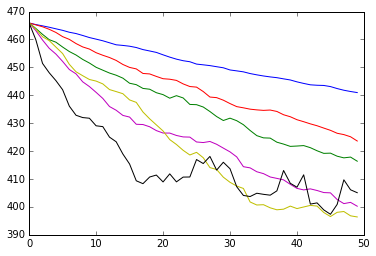

In [361]:
plt.plot(losses[0], c='b')
plt.plot(losses[1], c='r')
plt.plot(losses[2], c='g')
plt.plot(losses[3], c='m')
plt.plot(losses[4], c='y')
plt.plot(losses[5], c='k')

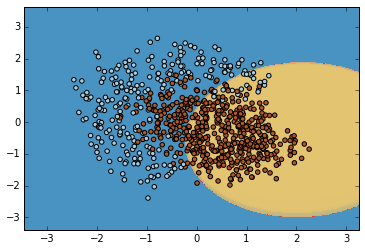

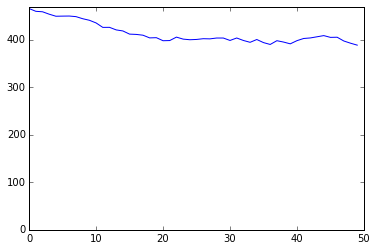

In [364]:
w = np.array([1,0,0,0,0,0])

alpha = alphas[4]

n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    plot_points(X[ind,:], y[ind], w)
    loss[i] = compute_loss(X, y, w)
    
    w = w - alpha * compute_grad(X[ind,:], y[ind], w)

plot_points(X, y, w)
plot_loss(loss)

Implement gradient descent with momentum and test it's performance for different learning rate and momentum values.

In [219]:
starttime = time()
n_iter = 50
batch_size = 4
losses = []
alphas = (0.001,0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9)
mus = (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95)
for alpha in alphas:
    for mu in mus:
        losses_iter = []
        for tst_iter in xrange(15):
            w = np.array([1,0,0,0,0,0])
            v = np.array([0,0,0,0,0,0])
            loss = np.zeros(n_iter)
            for i in range(n_iter):
                ind = random.sample(range(X.shape[0]), batch_size)
                #plot_points(X[ind,:], y[ind], w)
                loss[i] = compute_loss(X, y, w)
    
                v = mu * v - alpha * compute_grad(X[ind,:], y[ind], w)
                w = w + v
        
            losses_iter.append(loss) 
        loss = np.zeros(n_iter)
        for tst_iter in xrange(10):
            loss += losses_iter[tst_iter]
        losses.append(loss/10)
print time() - starttime

371.467135906


In [305]:
loss_by_param = []
for i in xrange(len(alphas)):
    for j in xrange(len(mus)):
        k = i * len(mus) + j
        if np.mean(losses[k]) < 500 and np.mean(losses[k][30:]) < 500:
            loss_by_param.append(np.array([i, j, round(np.mean(losses[k])), round(np.max(losses[k][30:])), round(np.mean(losses[k][30:])), round(np.min(losses[k]))]))
loss_by_param = np.array(loss_by_param, dtype=int)

In [306]:
sorted(loss_by_param, key = lambda x : x[3])

[array([  1,   1, 423, 411, 404, 394]),
 array([  1,   0, 423, 413, 407, 403]),
 array([  0,   9, 427, 414, 409, 407]),
 array([  1,   4, 417, 414, 409, 398]),
 array([  1,   2, 419, 415, 405, 398]),
 array([  0,   7, 430, 420, 410, 402]),
 array([  0,   8, 432, 426, 420, 418]),
 array([  0,   6, 435, 427, 415, 408]),
 array([  2,   2, 411, 427, 400, 383]),
 array([  1,   3, 432, 434, 427, 418]),
 array([  0,   5, 442, 435, 427, 420]),
 array([  0,   4, 444, 438, 431, 423]),
 array([  0,   3, 447, 441, 437, 432]),
 array([  0,   2, 448, 443, 438, 432]),
 array([  2,   0, 431, 443, 433, 411]),
 array([  0,   0, 453, 449, 445, 441]),
 array([  0,   1, 452, 449, 445, 440]),
 array([  0,  10, 432, 453, 426, 407]),
 array([  1,   5, 432, 455, 431, 415]),
 array([  2,   1, 437, 468, 436, 417]),
 array([  1,   6, 431, 470, 438, 408]),
 array([  2,   3, 448, 520, 476, 405]),
 array([  1,   7, 438, 523, 456, 404])]

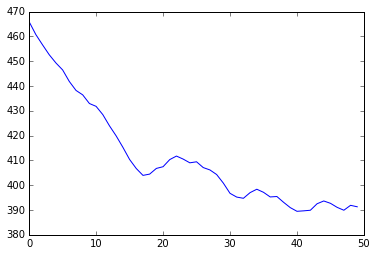

In [264]:
plt.plot(losses[1 * len(mus) + 5])

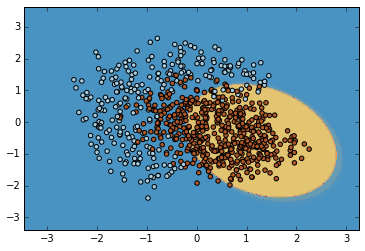

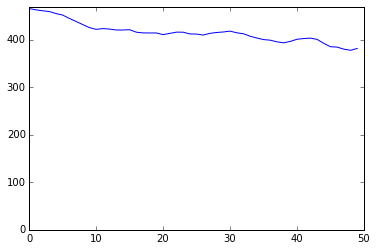

In [268]:
w = np.array([1,0,0,0,0,0])
v = np.array([0,0,0,0,0,0])

alpha = alphas[1] # learning rate
mu    = mus[5] # momentum

n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    plot_points(X[ind,:], y[ind], w)
    loss[i] = compute_loss(X, y, w)
    
    v = mu * v - alpha * compute_grad(X[ind,:], y[ind], w)
    w = w + v

plot_points(X, y, w)
plot_loss(loss)

Finally, try Nesterov's accelerated gradient

In [273]:
starttime = time()
n_iter = 50
batch_size = 4
losses = []
alphas = (0.001,0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9)
mus = (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95)
for alpha in alphas:
    for mu in mus:
        losses_iter = []
        for tst_iter in xrange(15):
            w = np.array([1,0,0,0,0,0])
            v = np.array([0,0,0,0,0,0])
            loss = np.zeros(n_iter)
            for i in range(n_iter):
                ind = random.sample(range(X.shape[0]), batch_size)
                #plot_points(X[ind,:], y[ind], w)
                loss[i] = compute_loss(X, y, w)
    
                v = mu * v - alpha * compute_grad_nesterov(X[ind,:], y[ind], w, v, mu)
                w = w + v
        
            losses_iter.append(loss) 
        loss = np.zeros(n_iter)
        for tst_iter in xrange(10):
            loss += losses_iter[tst_iter]
        losses.append(loss/10)
print time() - starttime

377.2001791


In [318]:
loss_by_param = []
for i in xrange(len(alphas)):
    for j in xrange(len(mus)):
        k = i * len(mus) + j
        if np.mean(losses[k]) < 500 and np.mean(losses[k][30:]) < 500:
            loss_by_param.append(np.array([i, j, round(np.mean(losses[k])), \
                                 round(np.max(losses[k][30:])), round(np.mean(losses[k][30:])), \
                                 round(np.min(losses[k][30:])), round(np.max(losses[k][20:40]))]))
loss_by_param = np.array(loss_by_param, dtype=int)

In [319]:
sorted(loss_by_param, key = lambda x : x[4])

[array([  2,   2, 411, 427, 400, 383, 402]),
 array([  1,   1, 423, 411, 404, 394, 421]),
 array([  1,   2, 419, 415, 405, 398, 416]),
 array([  1,   0, 423, 413, 407, 403, 421]),
 array([  0,   9, 427, 414, 409, 407, 425]),
 array([  1,   4, 417, 414, 409, 406, 409]),
 array([  0,   7, 430, 420, 410, 402, 435]),
 array([  0,   6, 435, 427, 415, 408, 441]),
 array([  0,   8, 432, 426, 420, 418, 427]),
 array([  0,  10, 432, 453, 426, 408, 423]),
 array([  0,   5, 442, 435, 427, 420, 445]),
 array([  1,   3, 432, 434, 427, 418, 429]),
 array([  0,   4, 444, 438, 431, 423, 447]),
 array([  1,   5, 432, 455, 431, 415, 425]),
 array([  2,   0, 431, 443, 433, 425, 437]),
 array([  2,   1, 437, 468, 436, 428, 443]),
 array([  0,   3, 447, 441, 437, 432, 449]),
 array([  0,   2, 448, 443, 438, 432, 451]),
 array([  1,   6, 431, 470, 438, 415, 434]),
 array([  0,   0, 453, 449, 445, 441, 455]),
 array([  0,   1, 452, 449, 445, 440, 455]),
 array([  1,   7, 438, 523, 456, 428, 444]),
 array([  

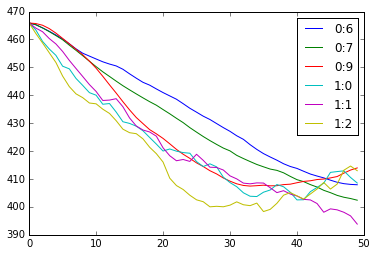

In [336]:
for el in loss_by_param:
    if el[3] < 460 and el[6] >= el[3] and el[5] < 410:
        plt.plot(losses[el[0] * len(mus) + el[1]], label = str(el[0]) + ':' + str(el[1]))
        plt.legend()

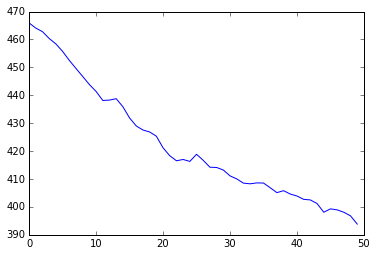

In [337]:
 plt.plot(losses[1 * len(mus) + 1])

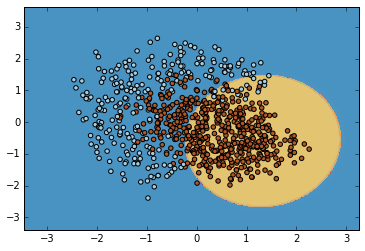

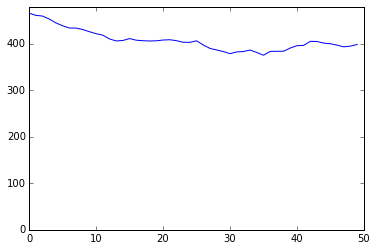

In [338]:
w = np.array([1,0,0,0,0,0], dtype=np.float64)
v = np.array([0,0,0,0,0,0], dtype=np.float64)

alpha = alphas[1] # learning rate
mu    = mus[1] # momentum

n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    plot_points(X[ind,:], y[ind], w)
    loss[i] = compute_loss(X, y, w)
    
    v = mu * v - alpha * compute_grad_nesterov(X[ind,:], y[ind], w, v, mu)
    w = w + v

plot_points(X, y, w)
plot_loss(loss)

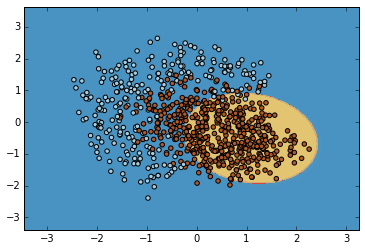

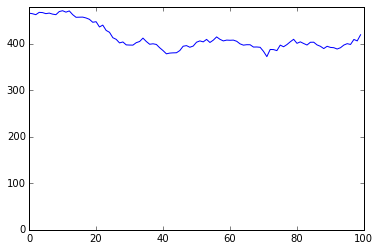

In [339]:
w = np.array([1,0,0,0,0,0])
v = np.array([0,0,0,0,0,0])

alpha = alphas[1] # learning rate
mu    = mus[1] # momentum

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    plot_points(X[ind,:], y[ind], w)
    loss[i] = compute_loss(X, y, w)
    
    v = mu * v - alpha * compute_grad_nesterov(X[ind,:], y[ind], w, v, mu)
    w = w + v

plot_points(X, y, w)
plot_loss(loss)

## Problem 2: Metric Learning

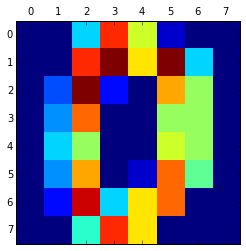

In [365]:
digits = datasets.load_digits(5)
digits.data /= 16.0
plt.matshow(digits.images[0])
plt.show()

n = digits.data.shape[0]

We are going to learn transfromation $f=Wx$ from 64-dimensional space to two-dimensional plane.

Our loss function should pull together two samples if their label is the same and repel them if they are close ($\|f_1-f_2\|<1$) and their labels differ. This task do not require the loss function itself, but you have to implement the computation of the gradient of this function.

In [417]:
def compute_grad_metric(w, x1, x2, label1, label2, lam=1):
    grad = np.zeros(w.shape)
    for elno in xrange(x1.shape[0]):
        if label1[elno] == label2[elno]:
            for i in xrange(w.shape[0]):
                for j in xrange(w.shape[1]):
                    grad[i, j] += 2 * w[i,j] * (x1[elno, j] - x2[elno, j]) ** 2 + lam * w[i, j]
        else:
            for i in xrange(w.shape[0]):
                for j in xrange(w.shape[1]):
                    if np.linalg.norm(w.dot(x1[elno] - x2[elno])) < 1:
                        grad[i, j] += - 2 * w[i,j] * (x1[elno, j] - x2[elno, j]) ** 2 + lam * w[i, j]
    grad = grad / x1.shape[0]
    return grad

Optimize matrix $w$ with one of implemented in problem 1 methods.

In [450]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

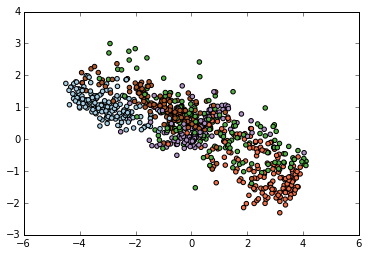

1944.96753192


In [424]:
w = np.random.randn(2, 64)
w = w / np.linalg.norm(w)
v = np.zeros(w.shape, dtype=np.float64)

alpha = 0.001  # learning rate
lam = 0.1      # regularization coeff

n_iter = 100000 # adjust if needed
n_vis  = 100   # adjust if needed
batch_size = 4

starttime = time()

for i in range(n_iter):
    
    indexes_left = random.sample(range(digits.data.shape[0]), batch_size)
    indexes_right = random.sample(range(digits.data.shape[0]), batch_size)
    
    w = w - alpha * compute_grad_metric(w, digits.data[indexes_left], digits.data[indexes_right],\
                                             digits.target[indexes_left], digits.target[indexes_right], lam)
    
    if i % n_vis == 0:
        X = np.dot(w, digits.data.transpose())
        plt.clf()
        plt.scatter(X[0, :], X[1, :], c=digits.target, cmap=plt.cm.Paired)
        #plt.xlim(-2.5, 2.5)
        #plt.ylim(-2.5, 2.5)
        display.clear_output(wait=True)
        display.display(plt.gcf())
plt.clf()
print time() - starttime

X = np.dot(digits.data, w.transpose())
y = digits.target
knn.fit(X, y)
score = knn.score(X, y)
print score

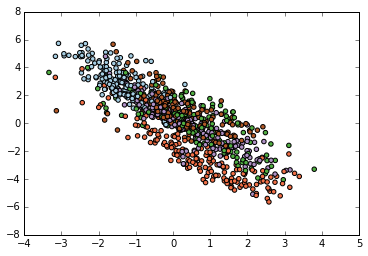

195.61918807
0.729189789123


In [457]:
w = np.random.randn(2, 64)
w = w / np.linalg.norm(w)
v = np.zeros(w.shape, dtype=np.float64)

alpha = 0.01  # learning rate
lam = 0.025      # regularization coeff

n_iter = 10000 # adjust if needed
n_vis  = 100   # adjust if needed
batch_size = 4

starttime = time()

for i in range(n_iter):
    
    indexes_left = random.sample(range(digits.data.shape[0]), batch_size)
    indexes_right = random.sample(range(digits.data.shape[0]), batch_size)
    
    w = w - alpha * compute_grad_metric(w, digits.data[indexes_left], digits.data[indexes_right],\
                                             digits.target[indexes_left], digits.target[indexes_right], lam)
    
    if i % n_vis == 0:
        X = np.dot(w, digits.data.transpose())
        plt.clf()
        plt.scatter(X[0, :], X[1, :], c=digits.target, cmap=plt.cm.Paired)
        #plt.xlim(-2.5, 2.5)
        #plt.ylim(-2.5, 2.5)
        display.clear_output(wait=True)
        display.display(plt.gcf())
plt.clf()
print time() - starttime

X = np.dot(digits.data, w.transpose())
y = digits.target
knn.fit(X, y)
score = knn.score(X, y)
print score

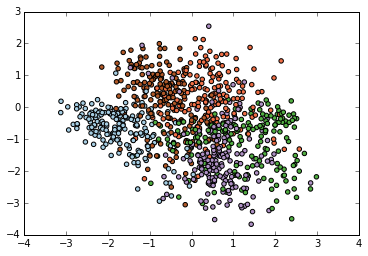

71.8419001102
0.785793562708


In [458]:
w = np.random.randn(2, 64)
w = w / np.linalg.norm(w)
v = np.zeros(w.shape, dtype=np.float64)

alpha = 0.01  # learning rate
lam = 0.025      # regularization coeff

n_iter = 3500 # adjust if needed
n_vis  = 100   # adjust if needed
batch_size = 4

starttime = time()

for i in range(n_iter):
    
    indexes_left = random.sample(range(digits.data.shape[0]), batch_size)
    indexes_right = random.sample(range(digits.data.shape[0]), batch_size)
    
    w = w - alpha * compute_grad_metric(w, digits.data[indexes_left], digits.data[indexes_right],\
                                             digits.target[indexes_left], digits.target[indexes_right], lam)
    
    if i % n_vis == 0:
        X = np.dot(w, digits.data.transpose())
        plt.clf()
        plt.scatter(X[0, :], X[1, :], c=digits.target, cmap=plt.cm.Paired)
        #plt.xlim(-2.5, 2.5)
        #plt.ylim(-2.5, 2.5)
        display.clear_output(wait=True)
        display.display(plt.gcf())
plt.clf()
print time() - starttime

X = np.dot(digits.data, w.transpose())
y = digits.target
knn.fit(X, y)
score = knn.score(X, y)
print score

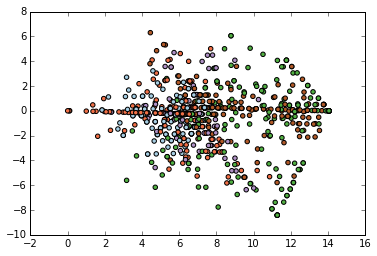

203.214672089
0.764705882353


In [459]:
w = np.random.randn(2, 64)
w = w / np.linalg.norm(w)
v = np.zeros(w.shape, dtype=np.float64)

alpha = 0.005  # learning rate
mu = 0.9       # mommentum
lam = 0.025    # regularization coeff

n_iter = 10000 # adjust if needed
n_vis  = 100   # adjust if needed
batch_size = 4

starttime = time()

for i in range(n_iter):
    
    indexes_left = random.sample(range(digits.data.shape[0]), batch_size)
    indexes_right = random.sample(range(digits.data.shape[0]), batch_size)

    v = mu * v - alpha * compute_grad_metric(w, digits.data[indexes_left], digits.data[indexes_right],\
                                             digits.target[indexes_left], digits.target[indexes_right], lam)
    w = w + v
    
    if i % n_vis == 0:
        X = np.dot(w, digits.data.transpose())
        plt.clf()
        plt.scatter(X[0, :], X[1, :], c=digits.target, cmap=plt.cm.Paired)
        #plt.xlim(-2.5, 2.5)
        #plt.ylim(-2.5, 2.5)
        display.clear_output(wait=True)
        display.display(plt.gcf())
plt.clf()
print time() - starttime

X = np.dot(digits.data, w.transpose())
y = digits.target
knn.fit(X, y)
score = knn.score(X, y)
print score

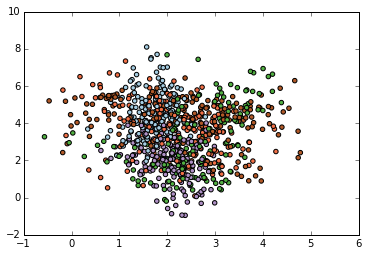

In [ ]:
w = np.random.randn(2, 64)
w = w / np.linalg.norm(w)
v = np.zeros(w.shape, dtype=np.float64)

alpha = 0.005  # learning rate
mu = 0.9       # mommentum
lam = 0.025    # regularization coeff

n_iter = 4000 # adjust if needed
n_vis  = 100   # adjust if needed
batch_size = 4

starttime = time()

for i in range(n_iter):
    
    indexes_left = random.sample(range(digits.data.shape[0]), batch_size)
    indexes_right = random.sample(range(digits.data.shape[0]), batch_size)

    v = mu * v - alpha * compute_grad_metric(w, digits.data[indexes_left], digits.data[indexes_right],\
                                             digits.target[indexes_left], digits.target[indexes_right], lam)
    w = w + v
    
    if i % n_vis == 0:
        X = np.dot(w, digits.data.transpose())
        plt.clf()
        plt.scatter(X[0, :], X[1, :], c=digits.target, cmap=plt.cm.Paired)
        #plt.xlim(-2.5, 2.5)
        #plt.ylim(-2.5, 2.5)
        display.clear_output(wait=True)
        display.display(plt.gcf())
plt.clf()
print time() - starttime

X = np.dot(digits.data, w.transpose())
y = digits.target
knn.fit(X, y)
score = knn.score(X, y)
print score

In [ ]:
score = []
starttime = time()
for i in xrange(10):
    w = np.random.randn(2, 64)
    X = np.dot(digits.data, w.transpose())
    y = digits.target
    knn.fit(X, y)
    score.append( knn.score(X, y) )
print score
print time() - starttime
print mean(score), max(score), min(score)

Visually and knn-measured best one is